In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

import IPython

sns.set(color_codes=True)

num_seeds = 41
test_idx=6558
actual_loss_diffs = [None] * num_seeds
predicted_loss_diffs = [None] * num_seeds
indices_to_remove = [None] * num_seeds
correlations = [None] * num_seeds

def ceil_divide(numer,denom):
    return (numer-1)//denom+1

In [2]:
for seed in range(num_seeds):
    f = np.load('../../scr/output-pre-june-1/mnist_small_all_cnn_c_hidden2_seed{}_wd1_damping2_iter-300000_retraining-100.npz'.format(seed))
    actual_loss_diffs[seed] = f['actual_loss_diffs']
    predicted_loss_diffs[seed] = f['predicted_loss_diffs']
    indices_to_remove[seed] = f['indices_to_remove']
    correlations[seed] = pearsonr(actual_loss_diffs[seed][-100:], predicted_loss_diffs[seed][-100:])[0]
actual_loss_diffs = np.array(actual_loss_diffs)
predicted_loss_diffs = np.array(predicted_loss_diffs)
indices_to_remove = np.array(indices_to_remove)
correlations = np.array(correlations)

print(correlations)

[0.79876032 0.89501095 0.80937284 0.83514002 0.80697077 0.87153364
 0.918462   0.9278211  0.76218515 0.86794468 0.82774551 0.88209872
 0.78983317 0.93384467 0.88768134 0.85572235 0.88446422 0.84090832
 0.83527085 0.81307604 0.79425688 0.91132351 0.88706357 0.92106504
 0.87311413 0.8611417  0.83594381 0.84916371 0.89578707 0.83773179
 0.88535705 0.88452077 0.85599591 0.82230081 0.83370235 0.89364811
 0.86540406 0.86950054 0.87159708 0.81777759 0.83966816]


In [3]:
print(np.mean(correlations))
print(np.std(correlations))
print(max(correlations))
print(min(correlations))

0.8573148847766762
0.04010356067778042
0.9338446664613604
0.7621851503960113


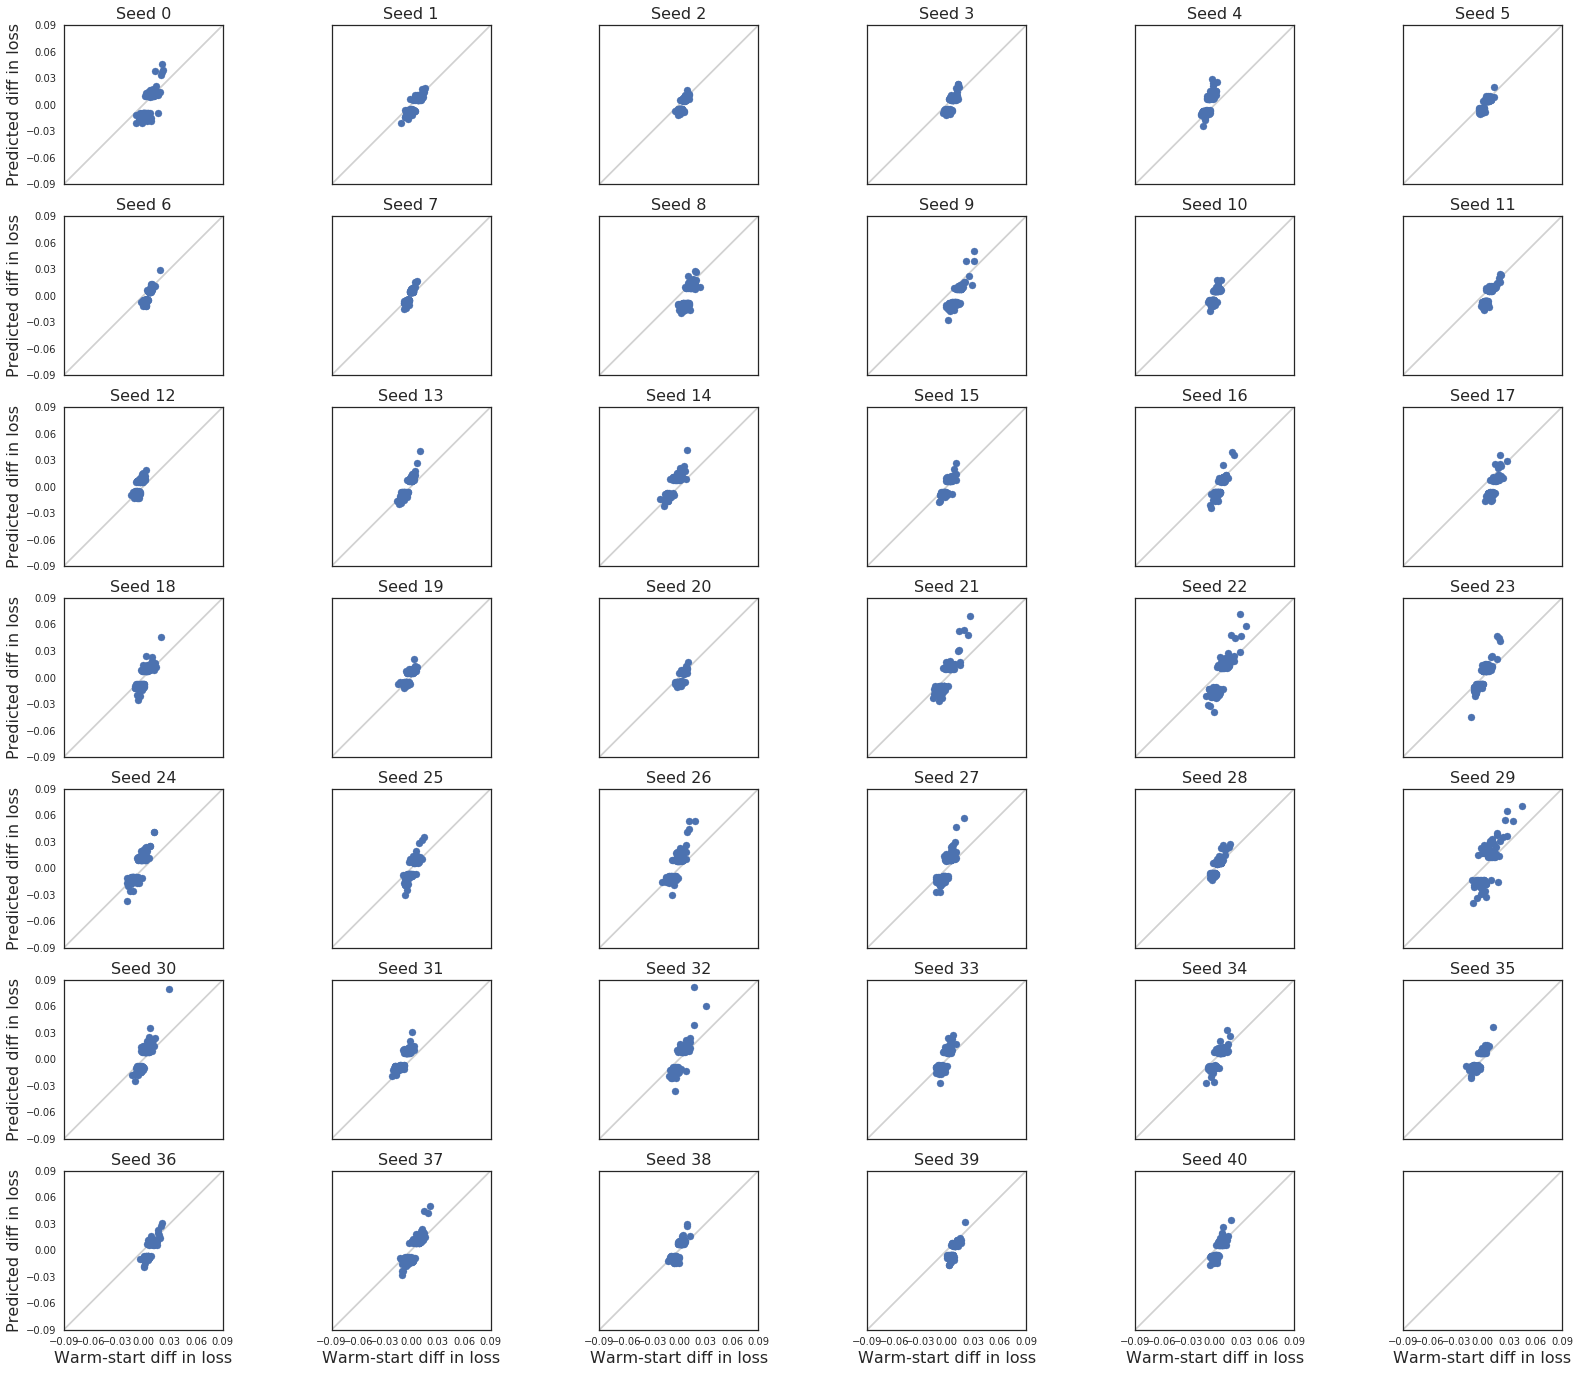

In [4]:
sns.set_style('white')
fontsize=16
width = 6
height = (num_seeds-1)//width+1
magnitude = 0.09
fig, axs = plt.subplots(height, width, sharex=True, sharey=True, figsize=(4*height, 4*width))

for row in axs: 
    row[0].set_ylabel('Predicted diff in loss', fontsize=fontsize)
    for ax in row:
        ax.set_aspect('equal')
        ax.set_xticks(np.arange(-0.03*(magnitude // 0.03), magnitude+0.01, 0.03))
        ax.set_yticks(np.arange(-0.03*(magnitude // 0.03), magnitude+0.01, 0.03))
        ax.set_xlim([-magnitude, magnitude])
        ax.set_ylim([-magnitude, magnitude])
        ax.plot([-magnitude, magnitude], [-magnitude, magnitude], 'k-', alpha=0.2, zorder=1)
for col in axs[-1]:
    col.set_xlabel('Warm-start diff in loss', fontsize=fontsize)

for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        seed = len(row)*i+j
        if seed < num_seeds:
            ax.scatter(actual_loss_diffs[seed], predicted_loss_diffs[seed], zorder=2)
            ax.set_title('Seed {}'.format(seed), fontsize=fontsize)

plt.savefig('../../scr/figs/hidden2_seeds.png', dpi=600, bbox_inches='tight')